In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
num_grids = 201

xs_lst = np.linspace(-5, 5, num_grids)
ys_lst = np.sin(xs_lst)

In [38]:
dx = np.diff(xs_lst).mean()

dia = -2 * np.ones(num_grids)
offdia = np.ones(num_grids - 1)
derivative_x_2 = np.mat( np.diag(dia, 0) + np.diag(offdia, 1) + np.diag(offdia, -1) )
derivative_x_2 = derivative_x_2 / np.power(dx, 2)
derivative_x_2 = - 1 / 2 * derivative_x_2

operator_kinetic = derivative_x_2

operator_kinetic

matrix([[ 400., -200.,    0., ...,    0.,    0.,    0.],
        [-200.,  400., -200., ...,    0.,    0.,    0.],
        [   0., -200.,  400., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,  400., -200.,    0.],
        [   0.,    0.,    0., ..., -200.,  400., -200.],
        [   0.,    0.,    0., ...,    0., -200.,  400.]])

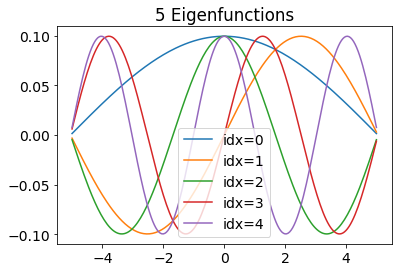

In [39]:
eig_vals_non_lst, eig_vecs_non_lst = np.linalg.eigh(operator_kinetic)

for idx in range(5):
    plt.plot(xs_lst, eig_vecs_non_lst[:, idx],
            label="idx={0}".format(idx))

plt.title('%d Eigenfunctions'%(5))
plt.legend()

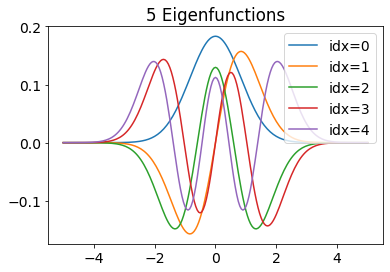

In [40]:
potentials_lst = np.power(xs_lst, 2)
potentials_matrix = np.diag(potentials_lst, 0)

H = operator_kinetic + potentials_matrix

eig_vals_harm_lst, eig_vecs_harm_lst = np.linalg.eigh(H)

for idx in range(5):
    plt.plot(xs_lst, eig_vecs_harm_lst[:, idx],
            label="idx={0}".format(idx))

plt.title('%d Eigenfunctions'%(5))
plt.legend()

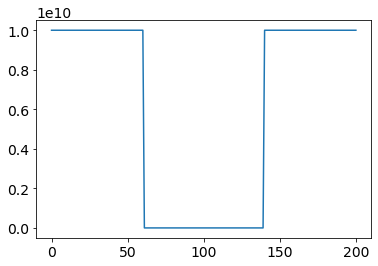

In [41]:
potentials_well_lst = np.full_like(xs_lst, 1e10)
potentials_well_lst[np.logical_and(xs_lst>-2, xs_lst<2)] = 0
plt.plot(potentials_well_lst)

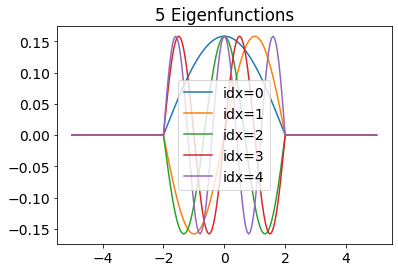

In [44]:
operator_potential_well = np.diag(potentials_well_lst, 0)
H = operator_kinetic + operator_potential_well

eig_vals_well_lst, eig_vecs_well_lst = np.linalg.eigh(H)

for idx in range(5):
    plt.plot(xs_lst, eig_vecs_well_lst[:, idx],
            label="idx={0}".format(idx))

plt.title('%d Eigenfunctions'%(5))
plt.legend()

In [47]:
def get_integral(xs_lst, ys_lst, axis=0):
    dx = np.diff(xs_lst).mean()
    return np.sum(ys_lst * dx, axis=axis)

print( get_integral(xs_lst = xs_lst,
                    ys_lst = np.power(eig_vecs_non_lst, 2),
                    axis=0
                    ) )

[[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.

In [54]:
def get_density(num_electrons, xs_lst, eig_vecs_lst):
    # 1. normalization
    I = get_integral(xs_lst=xs_lst,
                    ys_lst=np.power(eig_vecs_lst, 2),
                    axis=0)
    normed_vecs_lst = eig_vecs_lst / np.sqrt(I)

    # 2. occupation
    nums_electrons_lst = [2 for _ in range(num_electrons // 2)]
    if (num_electrons % 2):
        nums_electrons_lst.append(1)
    
    # 3. calcualte density
    densitys_lst = np.zeros_like(eig_vecs_lst[:, 0])
    for ne, psi in zip(nums_electrons_lst, normed_vecs_lst.T):
        densitys_lst += ne * np.power(psi.T, 2)
    
    return densitys_lst

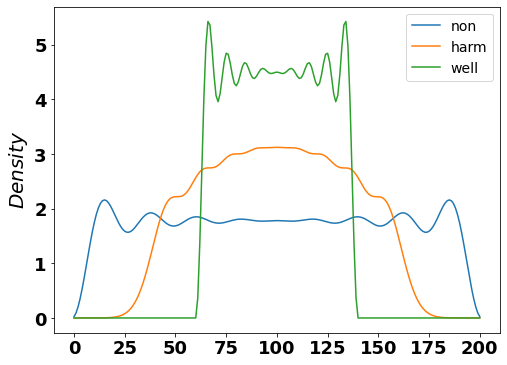

In [55]:
num_electrons = 17
plt.figure(figsize=(8, 6))
plt.plot( get_density(num_electrons,
                     xs_lst,
                     eig_vecs_non_lst), label="non")
plt.plot( get_density(num_electrons,
                     xs_lst,
                     eig_vecs_harm_lst), label="harm")
plt.plot( get_density(num_electrons,
                     xs_lst,
                     eig_vecs_well_lst), label="well")
## 3.1. retouch xlabel/ylabel

plt.ylabel("$Density$",
            fontsize="20",
            fontweight="bold")

## 3.2. retouch xticks/yticks
plt.xticks(fontsize="18",
            fontweight="bold")
plt.yticks(fontsize="18",
            fontweight="bold")

## 3.3. retouch legend
plt.rcParams.update({"font.size": 14})
plt.legend(loc=1)

plt.show()